In [1]:
import pandas as pd #data analysis library
import matplotlib.pyplot as plt #graphing
import seaborn as sns #graphing
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import SGDClassifier

df = pd.read_csv("abalone.csv") #read in data
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [2]:
# check how many abalone have 'Infant' as sex
(df["Sex"] == 'I').sum()

1342

In [3]:
# Remove all instances of infant
abalone_df = df[df.Sex != "I"]
abalone_df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
6,F,0.530,0.415,0.150,0.7775,0.2370,0.1415,0.330,20


In [4]:
# check the 5 number summary
abalone_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000,2835.000000
mean,0.569552,0.446407,0.154437,1.016849,0.439051,0.222526,0.291208,10.900882
std,0.095821,0.078850,0.037421,0.453217,0.212193,0.101880,0.128835,3.069252
min,0.155000,0.110000,0.015000,0.015500,0.006500,0.003000,0.005000,3.000000
25%,0.515000,0.400000,0.135000,0.701250,0.287000,0.152000,0.202500,9.000000
50%,0.585000,0.460000,0.155000,1.003000,0.431500,0.217000,0.285000,10.000000
75%,0.635000,0.500000,0.175000,1.289500,0.568750,0.287500,0.365000,12.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


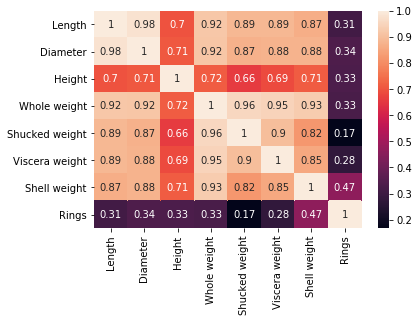

In [5]:
# check how correlated each feature is
correlation_matrix = abalone_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [6]:
#preprocessing
# We remove the features that are highly correlated and also have a lower variance
#We find the most influential features to be length, height, whole weight, and Rings, so we discard the remaining columns
updated_df = abalone_df.drop(columns = ['Diameter','Shucked weight', 'Viscera weight', 'Shell weight'])
updated_df.head()

,Sex,Length,Height,Whole weight,Rings
0,M,0.455,0.095,0.5140,15
1,M,0.350,0.090,0.2255,7
2,F,0.530,0.135,0.6770,9
3,M,0.440,0.125,0.5160,10
6,F,0.530,0.150,0.7775,20


In [7]:
length = updated_df['Length']
height = updated_df['Height']
weight = updated_df['Whole weight']
rings = updated_df['Rings']
x = updated_df.iloc[:,1:5]
x

,Length,Height,Whole weight,Rings
0,0.455,0.095,0.5140,15
1,0.350,0.090,0.2255,7
2,0.530,0.135,0.6770,9
3,0.440,0.125,0.5160,10
6,0.530,0.150,0.7775,20
...,...,...,...,...
4172,0.565,0.165,0.8870,11
4173,0.590,0.135,0.9660,10
4174,0.600,0.205,1.1760,9
4175,0.625,0.150,1.0945,10


In [8]:
y = updated_df['Sex']
y

0       M
1       M
2       F
3       M
6       F
       ..
4172    F
4173    M
4174    M
4175    F
4176    M
Name: Sex, Length: 2835, dtype: object

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, 
                                                    random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train) 
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)  # apply same transformation to test data

In [11]:
clf = SGDClassifier(loss="log", penalty="l1", max_iter=100000, alpha = .01)
clf.fit(x_train, y_train)
SGDClassifier(max_iter=100000)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=100000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
clf.predict(x_test)

array(['M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'F', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'F',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [13]:
score = clf.score(x_test, y_test)
print("Training score: ", score)

Training score:  0.5202821869488536


In [14]:
ypred = clf.predict(x_test)

#confusion matrix
cm = sklearn.metrics.confusion_matrix(y_test, ypred)
tn, fp, fn, tp = cm.ravel()
print(cm)

[[  3 268]
 [  4 292]]


In [15]:
print("Evaluation Metrics: ")
print("Classification Accuracy = ", (tp + tn)/ (tp + tn + fp + fn))
print("Misclassification Rate = ", (fp + fn)/ (tp + tn + fp + fn))
precision = (tp)/ (tp + fp)
recall = (tp)/ (tp + fn)
print("Sensitivity = ", recall )
print("Specificty = ", (tn)/ (tn + fp))
print("Precision = ", precision)
print("F1 Score = ", (2*((precision*recall)/(precision + recall))))
print("Learning Rate = ", .01)

Evaluation Metrics: 
Classification Accuracy =  0.5202821869488536
Misclassification Rate =  0.47971781305114636
Sensitivity =  0.9864864864864865
Specificty =  0.01107011070110701
Precision =  0.5214285714285715
F1 Score =  0.6822429906542057
Learning Rate =  0.01


In [16]:
#using logistic regression sklearn
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
logisticRegr.fit(x_train, y_train)
logisticRegr.predict(x_test[0].reshape(1,-1))
predictions = logisticRegr.predict(x_test)

In [18]:
cm = sklearn.metrics.confusion_matrix(y_test, predictions)
tn, fp, fn, tp = cm.ravel()
print(cm)

[[ 77 194]
 [ 67 229]]


In [19]:
print("Evaluation Metrics: ")
print("Classification Accuracy = ", (tp + tn)/ (tp + tn + fp + fn))
print("Misclassification Rate = ", (fp + fn)/ (tp + tn + fp + fn))
print("Classification Accuracy = ", (tp + tn)/ (tp + tn + fp + fn))
precision = (tp)/ (tp + fp)
recall = (tp)/ (tp + fn)
print("Sensitivity = ", recall )
print("Specificty = ", (tn)/ (tn + fp))
print("Precision = ", precision)
print("F1 Score = ", (2*((precision*recall)/(precision + recall))))
print("Learning Rate = ", .01)

Evaluation Metrics: 
Classification Accuracy =  0.5396825396825397
Misclassification Rate =  0.4603174603174603
Classification Accuracy =  0.5396825396825397
Sensitivity =  0.7736486486486487
Specificty =  0.28413284132841327
Precision =  0.541371158392435
F1 Score =  0.6369958275382476
Learning Rate =  0.01
